<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/Basic_Python_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Exercise -1
## 1. Number guessing game

11
CURRENT USER WIN STATUS: 0. CURRENT COMPUTER WIN STATUS: 0
Enter your choice: 11
YOU WON!!!
You guessed the number in 1 tries
68
CURRENT USER WIN STATUS: 1. CURRENT COMPUTER WIN STATUS: 0
Enter your choice: 1
Go Higher. Tries remaining: 4
Enter your choice: 2
Go Higher. Tries remaining: 3
Enter your choice: 3
Go Higher. Tries remaining: 2
Enter your choice: 4
Go Higher. Tries remaining: 1
Enter your choice: 5
Go Higher. Tries remaining: 0
YOU LOST!! The number was 68
34
CURRENT USER WIN STATUS: 1. CURRENT COMPUTER WIN STATUS: 1
Enter your choice: 34
YOU WON!!!
You guessed the number in 1 tries
36
CURRENT USER WIN STATUS: 2. CURRENT COMPUTER WIN STATUS: 1
Enter your choice: 45
Go Lower. Tries remaining: 4
Enter your choice: 9
Go Higher. Tries remaining: 3
Enter your choice: 98
Go Lower. Tries remaining: 2
Enter your choice: 99
Go Lower. Tries remaining: 1
Enter your choice: 100
Go Lower. Tries remaining: 0
YOU LOST!! The number was 36
54
CURRENT USER WIN STATUS: 2. CURRENT COMPUTER W

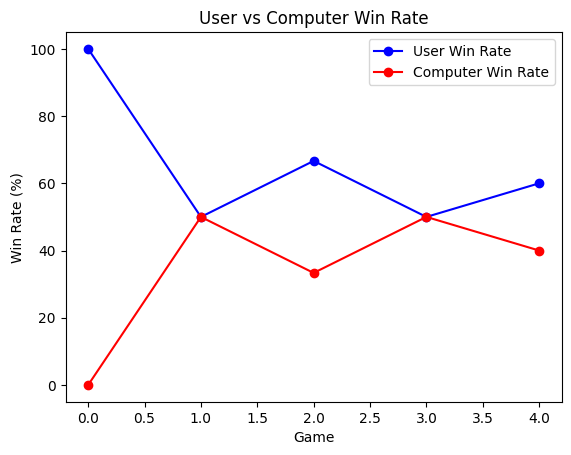

In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns


# Number of times game to be played
playcount = 5

# Number of chances given
chances = 5

user_win_rate=[]
comp_win_rate=[]

# Function to handle the game logic
def play(comp, count=0, user_win=0, comp_win=0, chances=chances):
    guessed = False
    while (not guessed):
        if (count == chances):
            print(f'YOU LOST!! The number was {comp}')
            comp_win += 1
            break
        else:
            user = int(input("Enter your choice: "))
            if (user > computer):
                count += 1
                print(f'Go Lower. Tries remaining: {chances - count}')
            elif (user < computer):
                count += 1
                print(f'Go Higher. Tries remaining: {chances - count}')
            elif (user == computer):
                print("YOU WON!!!")
                print(f'You guessed the number in {count+1} tries')
                user_win += 1
                guessed = True
                break
    return (user_win, comp_win)

user_win = 0
comp_win = 0


while playcount != 0:
    computer = random.randint(1, 100)
    print(computer) # ONLY For ease of collecting data
    print(f'CURRENT USER WIN STATUS: {user_win}. CURRENT COMPUTER WIN STATUS: {comp_win}')
    user_win, comp_win = play(computer, user_win=user_win, comp_win=comp_win)

    user_win_rate.append(user_win / (5 - playcount + 1) * 100)
    comp_win_rate.append(comp_win / (5 - playcount + 1) * 100)

    playcount -= 1

print(f'FINAL USER WIN STATUS: {user_win}. FINAL COMPUTER WIN STATUS: {comp_win}')

# Plotting the success rates
plt.plot(user_win_rate, label='User Win Rate', color='blue', marker='o')
plt.plot(comp_win_rate, label='Computer Win Rate', color='red', marker='o')
plt.xlabel('Game')
plt.ylabel('Win Rate (%)')
plt.title('User vs Computer Win Rate')
plt.legend()
plt.show()

## 2. Data import and column visualization


In [ ]:
import opendatasets as od
data_url = "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
od.download(data_url)

100%|██████████| 8.91k/8.91k [00:00<00:00, 14.1MB/s]

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check for null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data_about_columns = {'Mean':[],
                      'Median':[],
                      'Mode':[]}

for i in df.columns:
  data_about_columns['Mean'].append(round(df[i].mean(),2))
  data_about_columns['Median'].append(df[i].median())
  data_about_columns['Mode'].append(df[i].mode().values[0])

data_about_columns

{'Mean': [3.85, 120.89, 69.11, 20.54, 79.8, 31.99, 0.47, 33.24, 0.35],
 'Median': [3.0, 117.0, 72.0, 23.0, 30.5, 32.0, 0.3725, 29.0, 0.0],
 'Mode': [1, 99, 70, 0, 0, 32.0, 0.254, 22, 0]}

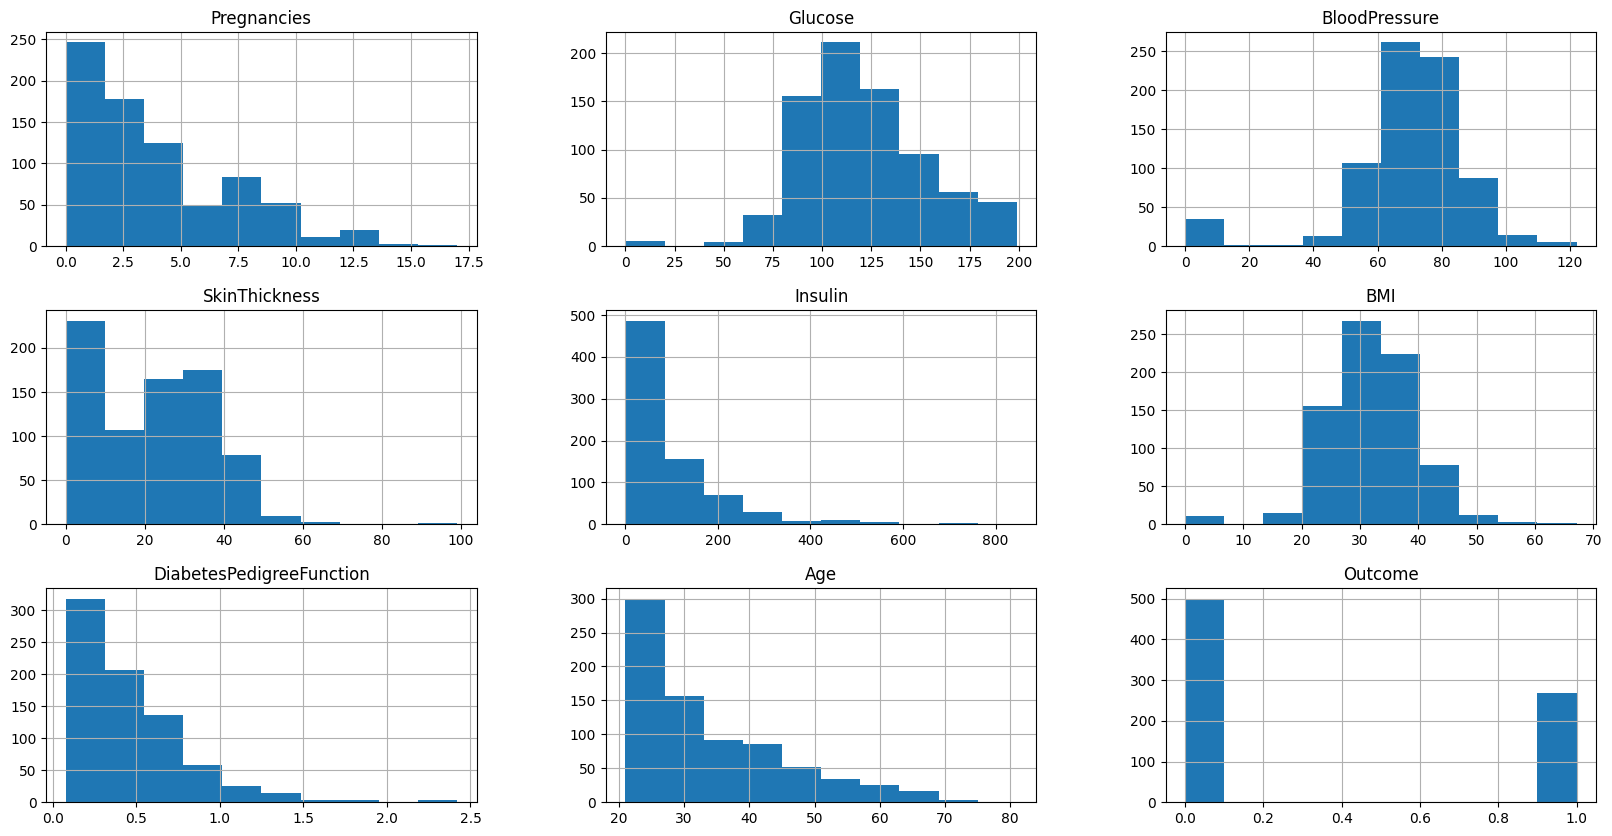

In [ ]:
# Historgrams of all columns
df.hist(figsize=(20,10), bins=10);

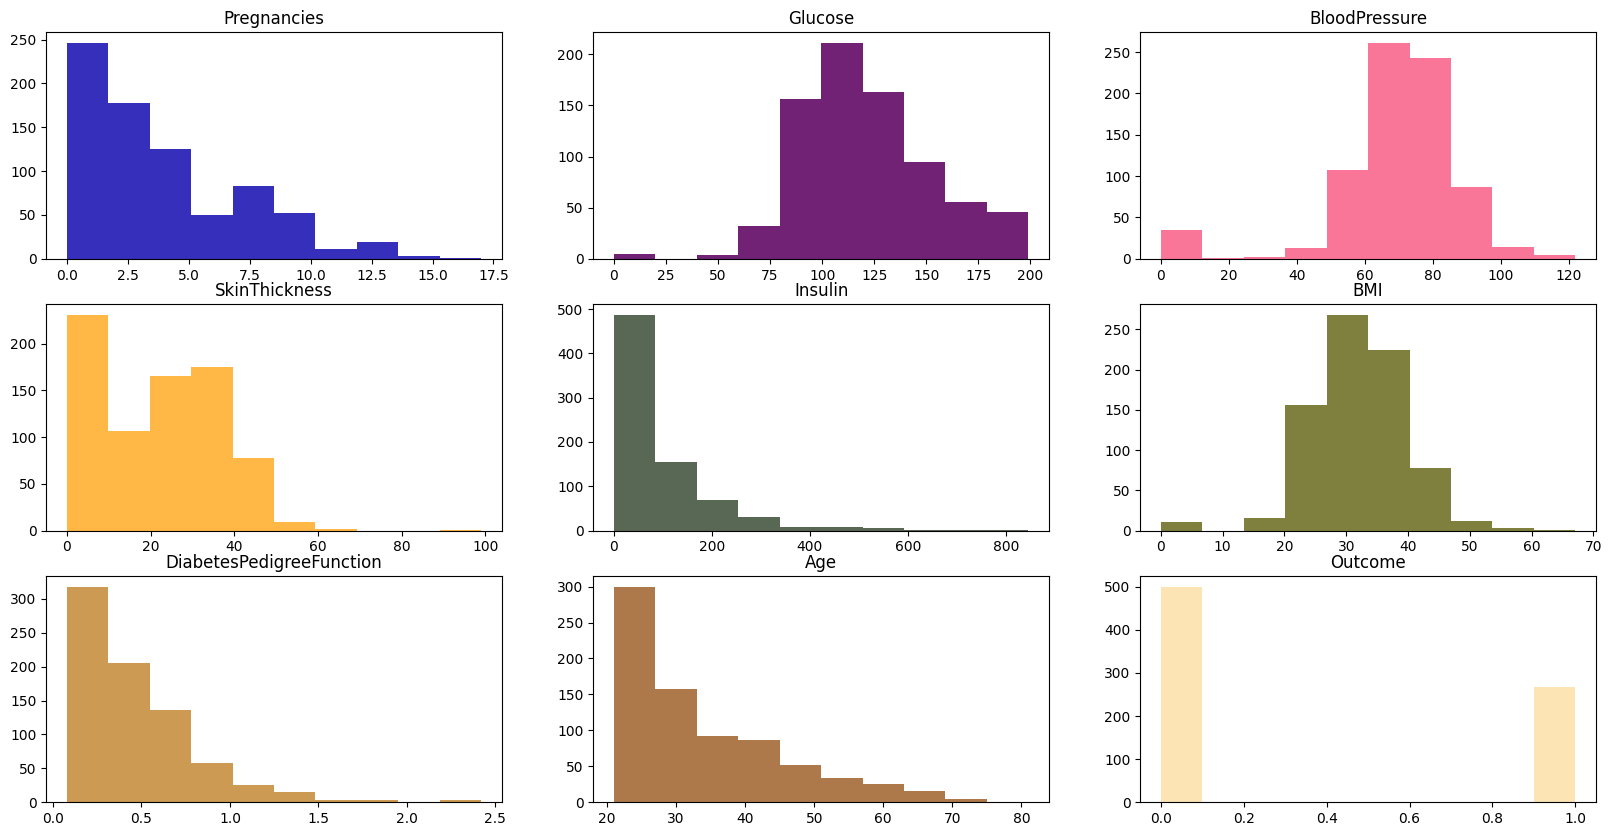

In [ ]:
# With different colors
colors = ['#362FBB', '#712275', '#F97698', '#FFB845', '#596854', '#7F803E', '#CC9A52', '#AD794B', '#FCE4B4']

fig, ax = plt.subplots(len(df.columns)//3,3 ,figsize=(20,10))
for i, column in enumerate(df.columns):
  ax[i//3, i%3].hist(df[column], color=colors[i])
  ax[i//3, i%3].set_title(column)

plt.show();

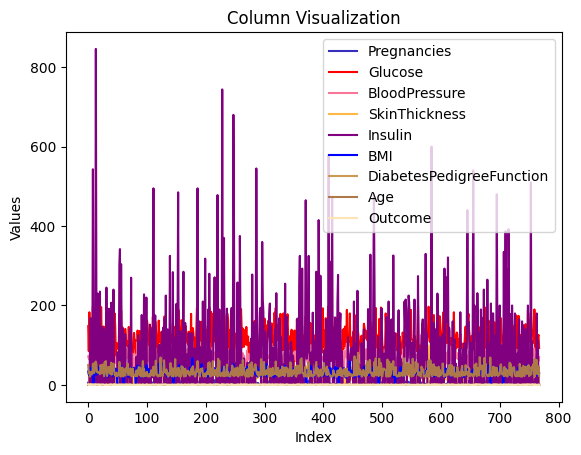

In [ ]:
# PLotting all columns

# Create a list of colors for each column
colors = ['#362FBB', 'red', '#F97698', '#FFB845', 'purple', 'blue', '#CC9A52', '#AD794B', '#FCE4B4']

for i, column in enumerate(df.columns):
    plt.plot(df[column], color=colors[i], label=column)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Column Visualization')
plt.legend()

Text(0.5, 1.0, 'Outcomes visualization')

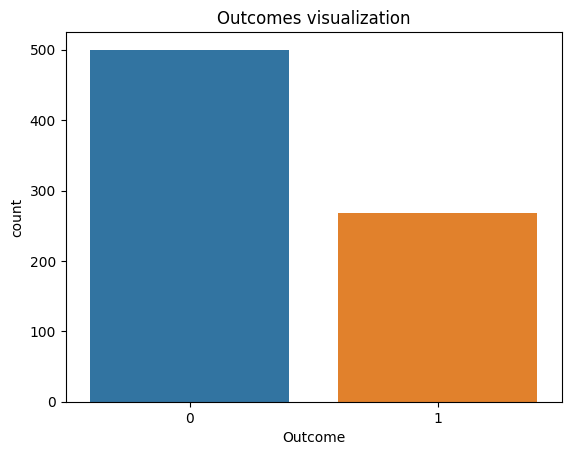

In [ ]:
sns.countplot(x='Outcome', data=df);
plt.title("Outcomes visualization")

<Axes: xlabel='BMI', ylabel='Age'>

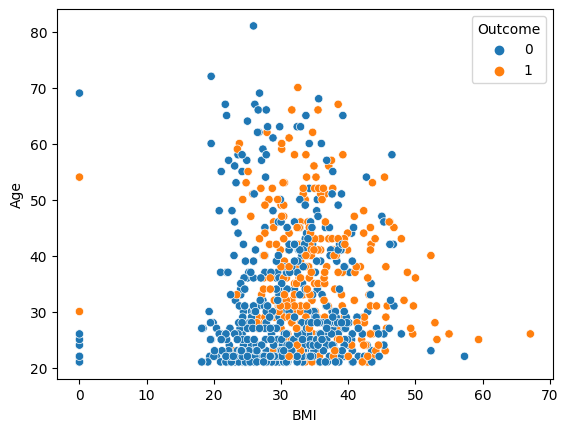

In [ ]:
# Plotting the relationship between BMI and Age of a person, with respect to outcome (diabetes)
sns.scatterplot(x='BMI', y='Age', data=df, hue='Outcome')

Text(0, 0.5, 'Frequency')

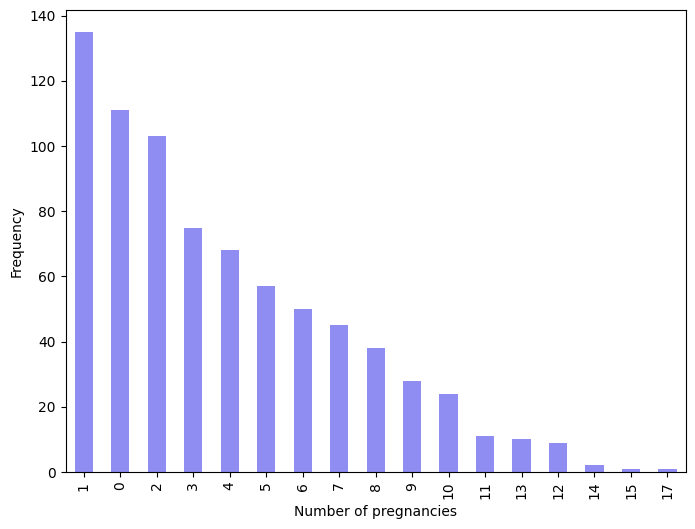

In [ ]:
# PLotting the Number of pregnancies and their frequencies
df['Pregnancies'].value_counts().plot(kind='bar', figsize=(8, 6), color='#8F8CF2')
plt.xlabel('Number of pregnancies')
plt.ylabel('Frequency')

Text(0, 0.5, 'pregnancies')

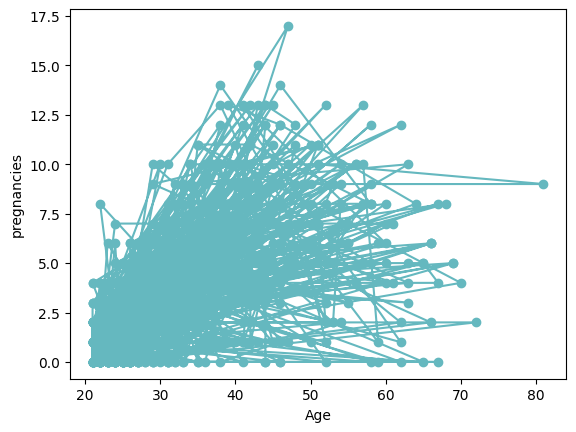

In [ ]:
# plotting the relationship between Age and Pregnancies
plt.plot(df['Age'], df['Pregnancies'], marker='o', color='#65B8BF')
plt.xlabel('Age')
plt.ylabel('pregnancies')